In [1]:
import sympy as sym
from sympy import Symbol, symbols, exp, sin, cos, series, Function, init_printing
from sympy import Derivative, diff, Eq, dsolve, collect, trigsimp, expand, simplify

init_printing() # Для красивой печати

Используя прямое разложение и метод Линдштеда-Пуанкаре получите первые три члена разложения, а также поправки к частоте колебаний. Определите, на каком интервале прямое разложение ведёт себя удовлетворительно.

б) $\ddot{x} + x - \varepsilon{x^3} = 0$, $x_0 = 0$, $\dot{x}_0 = b$

Прямой метод

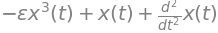

In [2]:
Nexpand= 3

x = Function('x')
t, b = symbols('t b', real=True)
epsilon = symbols('varepsilon', real=True)

eq = Derivative(x(t),t,t) + x(t) - epsilon*x(t)**3
eq

In [3]:
Nexpand=3 # Порядок разложения
X=[Function(f'x{i}') for i in range(Nexpand)] # Зададим набор функций
Xsubs=sum([X[i](t)*epsilon**i for i in range(Nexpand)])
Xsubs

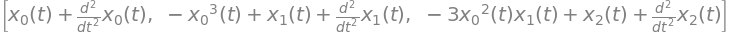

In [4]:
# Определяем уравнения для порядков 0,1,2
eqlst=[collect(sym.simplify(eq.subs(x(t),Xsubs).expand()),epsilon).coeff(epsilon,i)\
       for i in range(Nexpand)]
eqlst

In [5]:
#И начальные условия к ним в виде коллекции
icslst=[{X[0](0):0,diff(X[0](t),t).subs(t,0):b}] +\
       [{X[i](0):0,diff(X[i](t),t).subs(t,0):0} for i in range(1,Nexpand)]
[(n,eq,ics) for n,(eq,ics) in enumerate(zip(eqlst,icslst))]

icslst

⎡⎧          ⎛d        ⎞│      ⎫  ⎧          ⎛d        ⎞│      ⎫  ⎧          ⎛d
⎢⎨x₀(0): 0, ⎜──(x₀(t))⎟│   : b⎬, ⎨x₁(0): 0, ⎜──(x₁(t))⎟│   : 0⎬, ⎨x₂(0): 0, ⎜─
⎣⎩          ⎝dt       ⎠│t=0   ⎭  ⎩          ⎝dt       ⎠│t=0   ⎭  ⎩          ⎝d

        ⎞│      ⎫⎤
─(x₂(t))⎟│   : 0⎬⎥
t       ⎠│t=0   ⎭⎦

In [6]:
sol0=dsolve(eqlst[0],X[0](t),ics=icslst[0])
sollst={sol0.lhs:sol0.rhs.rewrite(exp)}

sollst

In [7]:
sym.classify_ode(eqlst[1].subs(sollst), X[1](t), ics=icslst[1])

('factorable',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [8]:
sol1 = sym.dsolve(eqlst[1].subs(sollst), X[1](t), ics=icslst[1], hint = 'nth_linear_constant_coeff_undetermined_coefficients')
sollst.update({sol1.lhs: sol1.rhs.rewrite(exp).collect(t)})

sollst

In [9]:
sym.classify_ode(eqlst[2].subs(sollst), X[2](t), ics=icslst[2])

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [10]:
sol2 = sym.dsolve(eqlst[2].subs(sollst), X[2](t), ics=icslst[2], hint = 'nth_linear_constant_coeff_undetermined_coefficients')
sollst.update({sol2.lhs: sol2.rhs.rewrite(exp).collect(t)})

sol2

In [11]:
# Преобразуем решения в тригонометрическую форму
sollsttrig=[epsilon**i*sollst[key].rewrite(cos).expand().collect(t) \
            for i,key in enumerate(sollst.keys())]
sollsttrig

In [12]:
solution = sum(sollsttrig)
solution

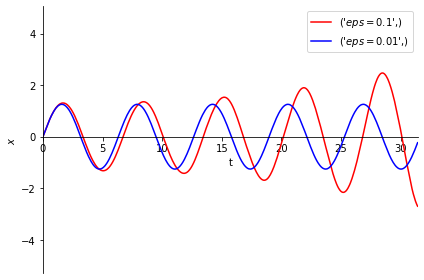

In [13]:
from sympy import pi
from sympy.plotting import plot

SolDira1=solution.subs(b,1.25)
T=5*2*pi

epslst=[10**(-i) for i in range(1,3)]
colorlst=["red","blue"]

pltlst=[SolDira1.subs(epsilon,epslst[i]) for i in range(len(epslst))]
pic1=plot(*pltlst,(t,0,T),show=False,\
          line_color='red',\
          ylabel=r'$x$',margin=0.5,xlim=(0,T.evalf()))

for i,color in enumerate(colorlst): 
    pic1[i].line_color = color
    pic1[i].label=f'$eps={epslst[i]}$',
pic1.legend =True 
pic1.show()

Полученное разложение неравномерно.

Метод Линдштеда-Пуанкаре

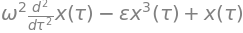

In [14]:
from sympy import solve
tau,Omega=symbols('tau,omega',real=True)

eqLP=Omega**2*Derivative(x(tau),tau,tau)+ x(tau) - epsilon*x(tau)**3
eqLP

In [15]:
omega = symbols(f'omega0:{Nexpand}')

Omegasubs = sum([omega[i]*epsilon**i for i in range(Nexpand)]).subs(omega[0], 1)
Xsubs = sum([X[i](tau)*epsilon**i for i in range(Nexpand)])

Omegasubs, Xsubs

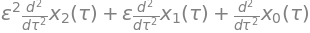

In [16]:
D2Xsubs = sum([Derivative(X[i](tau),tau,tau)*epsilon**i for i in range(Nexpand)])
D2Xsubs

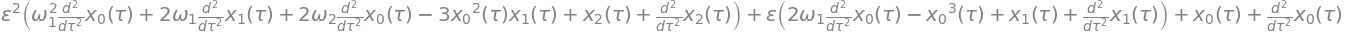

In [17]:
# Определяем уравнения для порядков 0,1,2
eqLPsubs=collect(eqLP.subs({Derivative(x(tau),tau,tau):D2Xsubs,\
                                     x(tau):Xsubs,\
                                     Omega:Omegasubs}).expand(),epsilon)
sum([epsilon**i*eqLPsubs.coeff(epsilon,i) for i in range(Nexpand)])

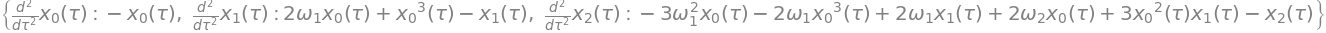

In [18]:
SubsD2X={}
EqLPlst=[]
for i in range(Nexpand):
    CurrD2=Derivative(X[i](tau),tau,tau)
    EqLPlst.append(eqLPsubs.coeff(epsilon,i).subs(SubsD2X).expand())
    CurrSubs=sym.solve(sym.Eq(EqLPlst[i],0),CurrD2)[0]
    SubsD2X.update({CurrD2:CurrSubs})
SubsD2X

In [19]:
icsLPlst=[{X[0](0):0,diff(X[0](tau),tau).subs(tau,0):b}] +\
       [{X[i](0):0,diff(X[i](tau),tau).subs(tau,0):0} for i in range(1,Nexpand)]
[(n,eq,ics) for n,(eq,ics) in enumerate(zip(eqlst,icslst))]


[(n,eq,ics) for n,(eq,ics) in enumerate(zip(EqLPlst,icsLPlst))]

⎡⎛             2                                       ⎞  ⎛                   
⎢⎜            d          ⎧          ⎛d        ⎞│      ⎫⎟  ⎜                   
⎢⎜0, x₀(τ) + ───(x₀(τ)), ⎨x₀(0): 0, ⎜──(x₀(τ))⎟│   : b⎬⎟, ⎜1, -2⋅ω₁⋅x₀(τ) - x₀
⎢⎜             2         ⎩          ⎝dτ       ⎠│τ=0   ⎭⎟  ⎜                   
⎣⎝           dτ                                        ⎠  ⎝                   

                 2                                       ⎞  ⎛                 
3               d          ⎧          ⎛d        ⎞│      ⎫⎟  ⎜       2         
 (τ) + x₁(τ) + ───(x₁(τ)), ⎨x₁(0): 0, ⎜──(x₁(τ))⎟│   : 0⎬⎟, ⎜2, 3⋅ω₁ ⋅x₀(τ) + 
                 2         ⎩          ⎝dτ       ⎠│τ=0   ⎭⎟  ⎜                 
               dτ                                        ⎠  ⎝                 

                                                                   2          
       3                                    2                     d          ⎧
2⋅ω₁⋅x₀ (τ) - 2⋅ω₁⋅x₁(τ) - 2⋅ω₂⋅x₀(τ) - 3⋅x₀ (τ)⋅x

In [20]:
solLP0 = sym.dsolve(EqLPlst[0], X[0](tau), ics=icsLPlst[0])
solLPlst = {solLP0.lhs : solLP0.rhs.rewrite(exp)}
Subsomega = {omega[0] : 1}
solLPlst

In [21]:
equation = EqLPlst[1].subs(solLPlst).subs(Subsomega)
sol=dsolve(equation,X[1](tau),
           ics=icsLPlst[1],hint = 'nth_linear_constant_coeff_undetermined_coefficients')
Subsomega.update({omega[1]:solve(sol.rhs.collect(tau).coeff(tau,1),omega[1])[0]})
solLPlst.update({sol.lhs:sol.rhs.subs(Subsomega).expand().rewrite(exp).collect(t)})    
solLPlst

In [22]:
equation = EqLPlst[2].subs(solLPlst).subs(Subsomega)
sol=dsolve(equation,X[2](tau),
           ics=icsLPlst[2],hint = 'nth_linear_constant_coeff_undetermined_coefficients')
Subsomega.update({omega[2]:solve(sol.rhs.collect(tau).coeff(tau,1),omega[2])[0]})
solLPlst.update({sol.lhs:sol.rhs.subs(Subsomega).expand().rewrite(exp).collect(t)})    

In [23]:
# Преобразуем решения в тригонометрическую форму
solLPlsttrig=[epsilon**i*solLPlst[key].rewrite(cos).expand().collect(tau) \
            for i,key in enumerate(solLPlst.keys())]
Omegasubs=Omegasubs.subs(Subsomega)
SolLP=sum(solLPlsttrig).subs(tau,Omegasubs*t)
sum(solLPlsttrig).subs(tau,Omega*t),Eq(Omega,Omegasubs)

In [24]:
solution

In [26]:
series(SolLP,epsilon,0,3).removeO()

Сравнение решений

In [27]:
sym.simplify(solution-series(SolLP,epsilon,0,3).removeO())

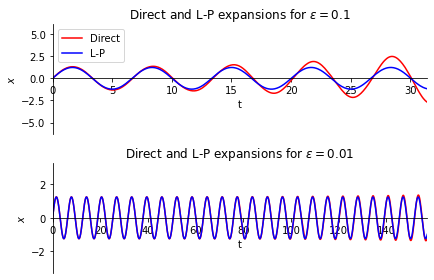

In [28]:
from sympy.plotting import PlotGrid
SolLPa1=SolLP.subs(b,1.25)
plteps1lst=[SolDira1.subs(epsilon,epslst[0]), SolLPa1.subs(epsilon,epslst[0])]
piceps1=plot(*plteps1lst,(t,0,T),show=False,\
          ylabel=r'$x$',margin=0.7,xlim=(0,T.evalf()),\
          title=f'Direct and L-P expansions for $\\varepsilon=${epslst[0]}')

for i,color in enumerate(colorlst): piceps1[i].line_color = color
piceps1[0].label="Direct"
piceps1[1].label="L-P"
piceps1.legend =True
plteps2lst=[SolDira1.subs(epsilon,epslst[1]), SolLPa1.subs(epsilon,epslst[1])]
piceps2=plot(*plteps2lst,(t,0,5*T),show=False,\
          ylabel=r'$x$',margin=0.7,xlim=(0,(5*T).evalf()),\
          title=f'Direct and L-P expansions for $\\varepsilon=${epslst[1]}')

for i,color in enumerate(colorlst): piceps2[i].line_color = color
piceps2[0].label="Direct"
piceps2[1].label="L-P"
PlotGrid(2,1,piceps1,piceps2)